## Pendahuluan

Seperti halnya metode bagi dua (*bisection*), metode Newton (atau dikenal juga sebagai metode Newton-Raphson) adalah metode numerik yang digunakan untuk menemukan akar (solusi) dari persamaan nonlinear $ f(x) = 0 $. Metode ini memanfaatkan informasi dari turunan fungsi $ f'(x) $ untuk mempercepat konvergensi menuju akar. Motivasi penggunaan metode Newton-Raphson terletak pada kecepatannya yang jauh lebih tinggi dibandingkan metode semacam *bisection*, asalkan nilai awal yang diberikan cukup dekat dengan akar sebenarnya.

Algoritma Metode Newton-Raphson

1. **Inisialisasi:**  
   - Pilih tebakan awal $ x_0 $ yang kira-kira mendekati akar yang dicari.

2. **Perhitungan Iteratif:**  
   - Hitung nilai fungsi $ f(x) $ dan turunan $ f'(x) $ pada titik $ x $ saat ini.
   - Perbarui nilai $ x $ menggunakan rumus:
     $$
     x_{\text{new}} = x - \frac{f(x)}{f'(x)}
     $$
   - Iterasi diulang sampai selisih antara $ x_{\text{new}} $ dan $ x $ lebih kecil dari toleransi yang ditentukan, atau sampai jumlah iterasi maksimum tercapai.

3. **Konvergensi:**  
   - Jika $ |x_{\text{new}} - x| $ kurang dari nilai toleransi, $ x_{\text{new}} $ dianggap sebagai akar persamaan $ f(x) = 0 $.

### *Pseudocode*

```markdown
input f, df, x0, tolerance, max_iter
output root
algorithm NewtonRaphson(f, df, x0, tol, max_iter):
    x = x0
    for i from 1 to max_iter do:
        x_new = x - f(x) / df(x)
        if |x_new - x| < tol then:
            return x_new
        x = x_new
    root = x
    return root
```

## Implementasi dalam Python

Berikut adalah contoh implementasi metode Newton-Raphson dalam Python, dengan fungsi $ f(x) $ dan turunannya $ f'(x) $ didefinisikan menggunakan `def`:

In [3]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    """
    Menemukan akar persamaan f(x) = 0 menggunakan metode Newton-Raphson.
    
    Parameter:
    f       : fungsi yang ingin dicari akarnya
    df      : turunan dari fungsi f(x)
    x0      : tebakan awal
    tol     : toleransi kesalahan (default 1e-6)
    max_iter: jumlah iterasi maksimum (default 100)
    
    Mengembalikan:
    x       : nilai aproksimasi akar
    """
    x = x0
    for i in range(max_iter):
        x_new = x - f(x) / df(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Contoh penggunaan fungsi newton_raphson dengan f(x) = x^2 - 4 dan turunannya f'(x) = 2x
def func(x):
    return x**2 - 4

def dfunc(x):
    return 2 * x

# Tebakan awal
x0 = 3.0
root = newton_raphson(func, dfunc, x0)
print("Akar dari f(x) = x^2 - 4 adalah:", root)


Akar dari f(x) = x^2 - 4 adalah: 2.0


## Aplikasi Fisika dengan Newton-Raphson

### 1. Penerapan pada Gerak Parabola

Misalkan kita ingin mencari waktu $ t $ ketika sebuah proyektil mencapai ketinggian tertentu $ h_{\text{target}} $. Persamaan ketinggian dalam gerak vertikal adalah:
$$
y(t) = v_0 t - \frac{1}{2} g t^2
$$
Untuk mencari $ t $ sehingga $ y(t) = h_{\text{target}} $, didefinisikan fungsi:
$$
f(t) = v_0 t - \frac{1}{2} g t^2 - h_{\text{target}}
$$
Turunan fungsi tersebut adalah:
$$
f'(t) = v_0 - g t
$$
Implementasi dalam Python diberikan berikut ini.

In [4]:
# Parameter gerak parabola
v0 = 20.0       # kecepatan awal (m/s)
g = 9.81        # percepatan gravitasi (m/s^2)
h_target = 15.0 # ketinggian target (m)

# Definisikan fungsi f(t)
def height_diff(t):
    return v0 * t - 0.5 * g * t**2 - h_target

# Definisikan turunan dari fungsi f(t)
def dheight_diff(t):
    return v0 - g * t

# Tebakan awal untuk waktu, misal t0 = 1 detik
t0 = 1.0
t_root = newton_raphson(height_diff, dheight_diff, t0)
print("Waktu saat mencapai ketinggian", h_target, "m adalah t =", t_root, "detik")

Waktu saat mencapai ketinggian 15.0 m adalah t = 0.9907186004097962 detik


### 2. Penerapan pada Sistem Pegas Nonlinear

Tinjau sistem dengan potensial nonlinear:
$$
U(x) = \frac{1}{4} k x^4 - m g x
$$
Akar keseimbangan dicari dengan mensyaratkan:
$$
f(x) = \frac{dU}{dx} = k x^3 - m g = 0
$$
Turunan fungsi $ f(x) $ adalah:
$$
f'(x) = 3 k x^2
$$

Implementasi dalam Python diberikan di bawah ini.

In [5]:
# Parameter sistem pegas non-linear
k = 10.0       # konstanta pegas (N/m^3)
m = 1.0        # massa (kg)
g = 9.81       # percepatan gravitasi (m/s^2)

# Definisikan fungsi f(x)
def force_balance(x):
    return k * x**3 - m * g

# Definisikan turunan dari fungsi f(x)
def dforce_balance(x):
    return 3 * k * x**2

# Tebakan awal, misalnya x0 = 1
x0 = 1.0
x_root = newton_raphson(force_balance, dforce_balance, x0)
print("Posisi keseimbangan sistem pegas adalah x =", x_root, "meter")

Posisi keseimbangan sistem pegas adalah x = 0.9936261267216437 meter


## Kelebihan dan Kekurangan Metode Newton-Raphson

### Kelebihan
- **Kecepatan Konvergensi:**  
  Metode ini memiliki konvergensi yang cepat (secara kuadratik) jika tebakan awal cukup dekat dengan akar.
- **Efisiensi:**  
  Jumlah iterasi yang diperlukan relatif sedikit, sehingga dapat menghemat waktu komputasi.
- **Aplikasi Luas:**  
  Cocok untuk berbagai jenis persamaan nonlinear, asalkan fungsi turunan dapat dihitung.

### Kekurangan
- **Kebutuhan Turunan:**  
  Memerlukan perhitungan turunan $ f'(x) $, yang bisa saja sulit diperoleh secara analitik.
- **Sensitivitas terhadap Tebakan Awal:**  
  Jika tebakan awal tidak dekat dengan akar, metode ini bisa divergen (tidak konvergen) atau malah "tersasar" konvergen ke akar yang tidak diinginkan.
- **Masalah Divergensi:**  
  Jika $ f'(x) $ bernilai nol atau sangat kecil, metode ini bisa gagal atau menghasilkan pembagian dengan nol.

## Pengayaan: Melihat Proses Iterasi Metode Newton-Raphson

Dengan Python, kita dapat memvisualisasikan proses iterasi metode Newton-Raphson sekaligus mencetak tabel yang berisi data yang relevan pada setiap iterasi.

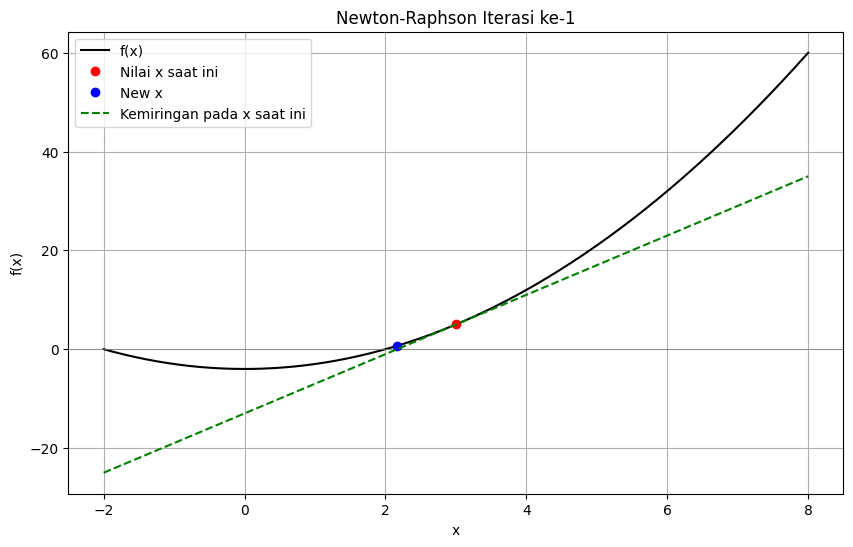

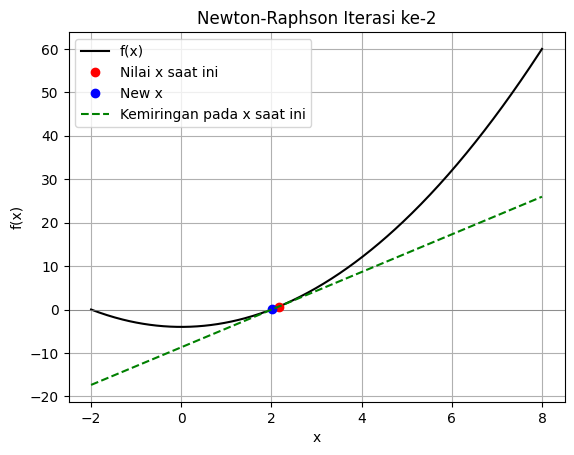

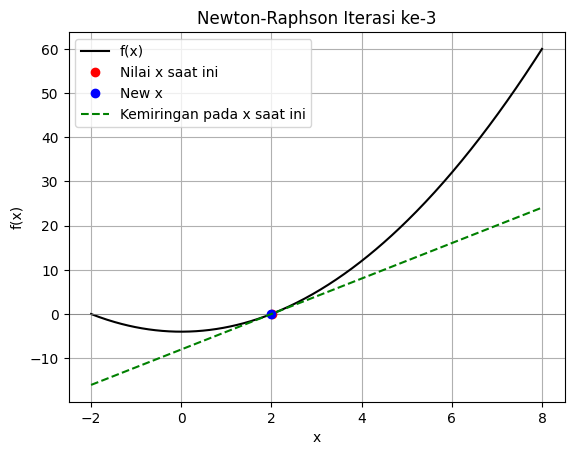

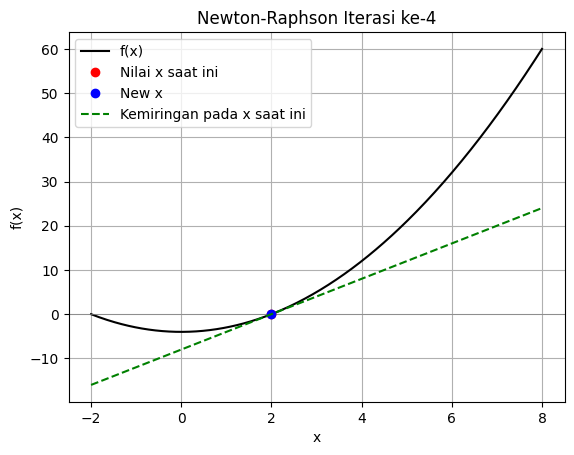

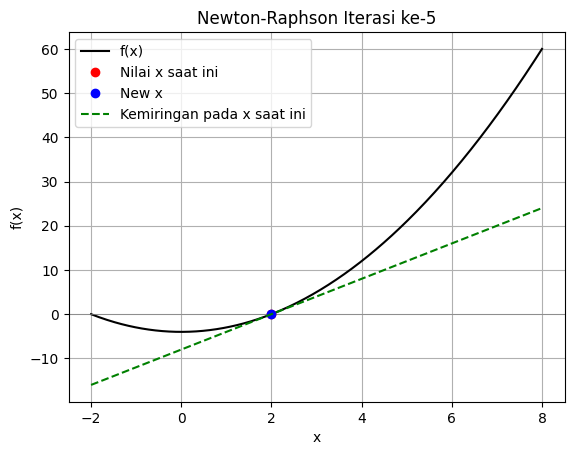

Konvergen pada iterasi ke-5
Iterasi    x_n             f(x_n)          Error          
----------------------------------------------------------
1          3.00000000      5.00000000      0.83333333     
2          2.16666667      0.69444444      0.16025641     
3          2.00641026      0.02568212      0.00640002     
4          2.00001024      0.00004096      0.00001024     
5          2.00000000      0.00000000      0.00000000     
6          2.00000000      0.00000000      0.00000000     
Akar aproksimasi dari f(x)=x^2-4 adalah: 2.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def newton_raphson_visual_table(f, df, x0, tol=1e-6, max_iter=20):
    """
    Menemukan akar persamaan f(x)=0 menggunakan metode Newton-Raphson dengan visualisasi
    dan pencetakan tabel iterasi.

    Parameter:
    f       : fungsi yang ingin dicari akarnya
    df      : turunan dari fungsi f(x)
    x0      : tebakan awal
    tol     : toleransi kesalahan (default 1e-6)
    max_iter: jumlah iterasi maksimum (default 20)

    Mengembalikan:
    x       : nilai aproksimasi akar
    """
    iteration_data = []  # Menyimpan data iterasi: (iterasi, x, f(x), error)
    x = x0
    # Tentukan rentang x untuk visualisasi
    x_range = np.linspace(x0 - 5, x0 + 5, 400)
    
    plt.figure(figsize=(10, 6))
    
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        # Hitung nilai x berikutnya dengan formula Newton-Raphson
        x_new = x - fx / dfx
        error = abs(x_new - x)
        iteration_data.append((i+1, x, fx, error))
        
        # Visualisasi iterasi
        plt.clf()  # Bersihkan plot dari iterasi sebelumnya
        # Plot fungsi f(x)
        y_vals = f(x_range)
        plt.plot(x_range, y_vals, 'k-', label='f(x)')
        plt.axhline(0, color='gray', lw=0.5)
        
        # Tandai titik saat ini dan titik baru
        plt.plot(x, f(x), 'ro', label='Nilai x saat ini')
        plt.plot(x_new, f(x_new), 'bo', label='New x')
        
        # Gambar garis singgung (tangent line) di titik x: y = f(x) + df(x)*(x - current x)
        tangent_line = fx + dfx * (x_range - x)
        plt.plot(x_range, tangent_line, 'g--', label='Kemiringan pada x saat ini')
        
        plt.title(f"Newton-Raphson Iterasi ke-{i+1}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend(loc='upper left')
        plt.grid(True)
        plt.pause(1)  # Jeda 1 detik setiap iterasi
        
        if error < tol:
            print(f"Konvergen pada iterasi ke-{i+1}")
            x = x_new
            iteration_data.append((i+2, x, f(x), 0.0))
            break
        
        x = x_new
    
    plt.show()
    
    # Cetak tabel iterasi
    header = "{:<10} {:<15} {:<15} {:<15}".format("Iterasi", "x_n", "f(x_n)", "Error")
    print(header)
    print("-" * len(header))
    for data in iteration_data:
        iter_no, x_val, f_val, err = data
        print("{:<10d} {:<15.8f} {:<15.8f} {:<15.8f}".format(iter_no, x_val, f_val, err))
    
    return x

# Contoh penggunaan dengan fungsi f(x) = x^2 - 4 dan turunan df(x)=2x
def f(x):
    return x**2 - 4

def df(x):
    return 2*x

if __name__ == "__main__":
    x0 = 3.0  # Tebakan awal
    root = newton_raphson_visual_table(f, df, x0)
    print("Akar aproksimasi dari f(x)=x^2-4 adalah:", root)
